In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
df = pd.read_csv('Instagram visits clustering.csv')

In [199]:
df.head()

,User ID,Instagram visit score,Spending_rank(0 to 100)
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397


In [200]:
df.tail()

,User ID,Instagram visit score,Spending_rank(0 to 100)
2595,2595,25,25.745908
2596,2596,52,9.275066
2597,2597,100,84.999487
2598,2598,87,20.530806
2599,2599,34,76.388622


In [201]:
df.shape

(2600, 3)

In [202]:
df.columns 

Index(['User ID', 'Instagram visit score', 'Spending_rank(0 to 100)'], dtype='object')

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User ID                  2600 non-null   int64  
 1   Instagram visit score    2600 non-null   int64  
 2   Spending_rank(0 to 100)  2600 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 61.1 KB


In [204]:
df.describe()

,User ID,Instagram visit score,Spending_rank(0 to 100)
count,2600.000000,2600.000000,2600.000000
mean,1299.500000,63.323462,42.848408
std,750.699674,26.579760,28.758349
min,0.000000,5.000000,0.940709
25%,649.750000,38.000000,19.452098
50%,1299.500000,72.000000,28.013082
75%,1949.250000,86.000000,72.116945
max,2599.000000,118.000000,107.349821


In [205]:
df.isnull().sum()

User ID                    0
Instagram visit score      0
Spending_rank(0 to 100)    0
dtype: int64

In [206]:
df.duplicated().sum()

0

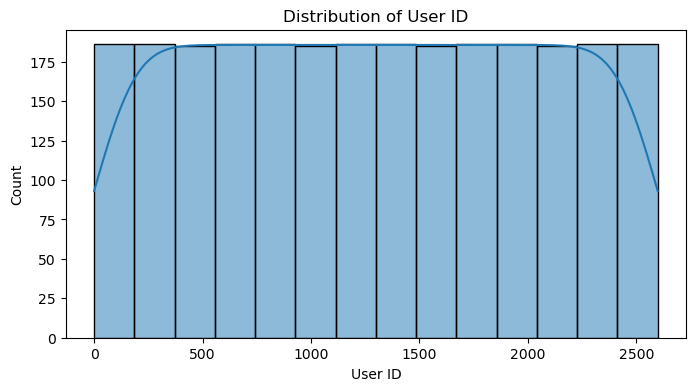

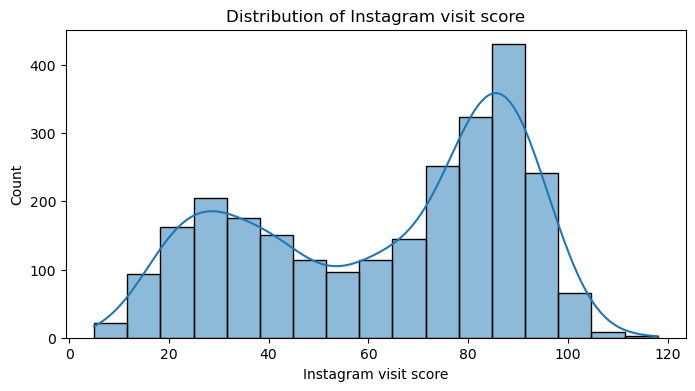

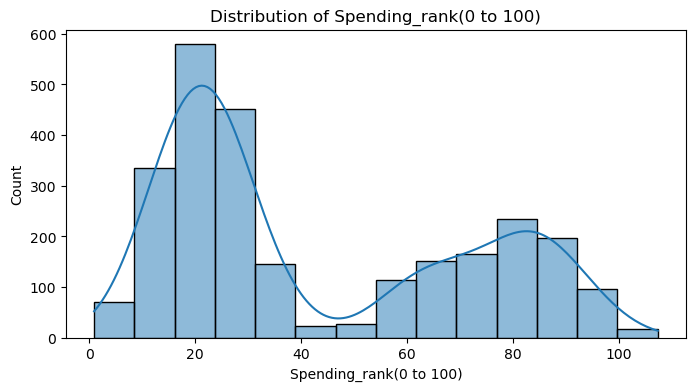

In [207]:
for i in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

In [208]:
df.corr()


,User ID,Instagram visit score,Spending_rank(0 to 100)
User ID,1.000000,0.005099,0.025610
Instagram visit score,0.005099,1.000000,0.051663
Spending_rank(0 to 100),0.025610,0.051663,1.000000


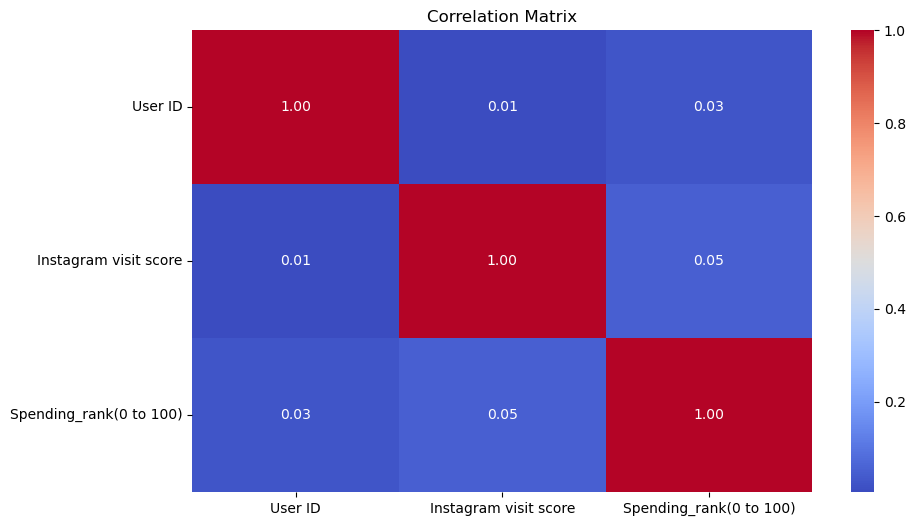

In [209]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), fmt='.2f', annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [210]:
df= df.drop(columns=['User ID'])

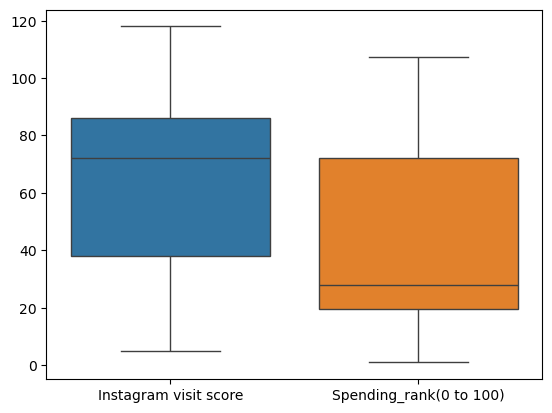

In [211]:
sns.boxplot(data=df)
plt.show()


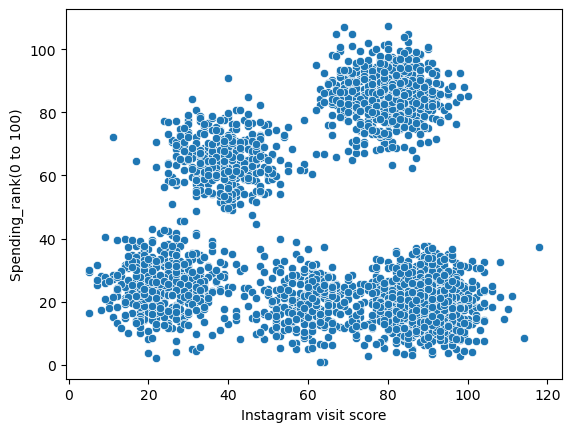

In [212]:
sns.scatterplot(
    x='Instagram visit score',
    y='Spending_rank(0 to 100)',
    data=df
)
plt.show()


In [213]:
X = df[['Instagram visit score', 'Spending_rank(0 to 100)']]

In [214]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\Devendra kushwah\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\Users\Devendra kushwah\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\Users\Devendra kushwah\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\Users\Devendra kushwah\AppData\Roaming\P

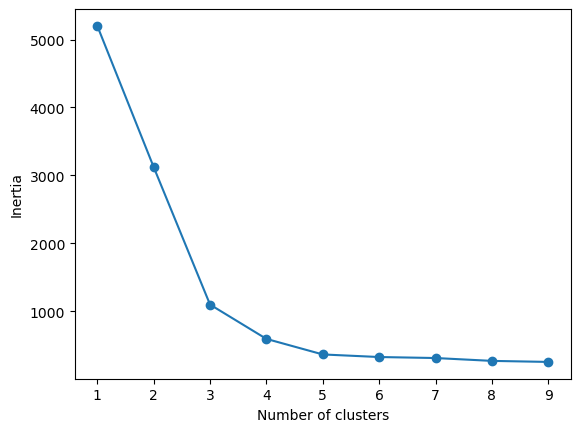

In [215]:
from sklearn.cluster import KMeans

inertia = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()


In [216]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


C:\Users\Devendra kushwah\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


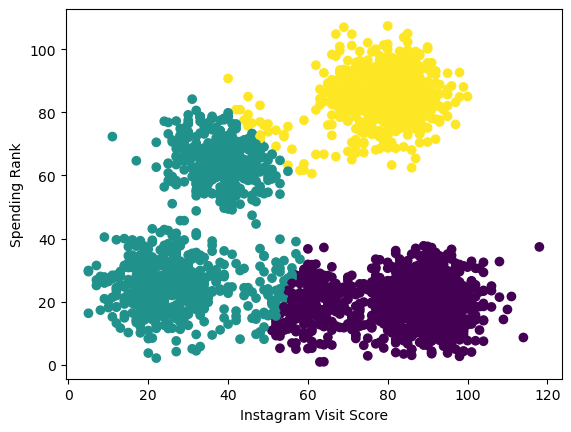

In [217]:
plt.scatter(
    df['Instagram visit score'],
    df['Spending_rank(0 to 100)'],
    c=df['Cluster']
)
plt.xlabel("Instagram Visit Score")
plt.ylabel("Spending Rank")
plt.show()
